# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
with open('/content/drive/MyDrive/customer_booking.csv', 'r', encoding='utf-8', errors='replace') as dataset:
    df = pd.read_csv(dataset)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Metode `.info()` memberi kita deskripsi data, memberi tahu kita nama kolom, tipe datanya, dan berapa banyak nilai null yang kita miliki. Untungnya, kami tidak memiliki nilai nol. Sepertinya beberapa kolom ini harus diubah menjadi tipe data yang berbeda, mis. hari_penerbangan.

Untuk memberikan lebih banyak konteks, di bawah ini adalah deskripsi data yang lebih detail, yang menjelaskan dengan tepat arti setiap kolom:

- `num_passengers` = jumlah penumpang yang bepergian
- `sales_channel` = Pemesanan saluran penjualan telah dilakukan
- `trip_type` = Jenis Perjalanan (Pulang Pergi, Sekali Jalan, Perjalanan Berkeliling)
- `purchase_lead` = jumlah hari antara tanggal perjalanan dan tanggal pemesanan
- `length_of_stay` = jumlah hari yang dihabiskan di tempat tujuan
- `flight_hour` = jam keberangkatan penerbangan
- `flight_day` = hari dalam minggu keberangkatan penerbangan
- `rute` = asal -> rute penerbangan tujuan
- `booking_origin` = negara asal pemesanan
- `wants_extra_baggage` = jika pelanggan menginginkan bagasi tambahan dalam pemesanan
- `wants_preferred_seat` = jika pelanggan menginginkan kursi pilihan dalam pemesanan
- `wants_in_flight_meals` = jika pelanggan menginginkan makanan dalam penerbangan dalam pemesanan
- `flight_duration` = total durasi penerbangan (dalam jam)
- `booking_complete` = bendera yang menunjukkan jika pelanggan telah menyelesaikan pemesanan

Sebelum kita menghitung statistik apa pun pada data, mari lakukan konversi data yang diperlukan

In [45]:
column = df.columns.to_numpy()

# column numerical
numeric_column = df.select_dtypes(include=['int64', 'float64']).columns.to_numpy()

# column categorical
categoric_column = df.select_dtypes(include=['object']).columns.to_numpy()

In [46]:
for columns in column:
  print(f'Kolom {columns}')
  print(df[columns].value_counts())
  print('-'*30, '\n')

Kolom num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64
------------------------------ 

Kolom sales_channel
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64
------------------------------ 

Kolom trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64
------------------------------ 

Kolom purchase_lead
1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64
------------------------------ 

Kolom length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64
------------------------------ 

Kolom flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085


Univariate Analysis

<Axes: >

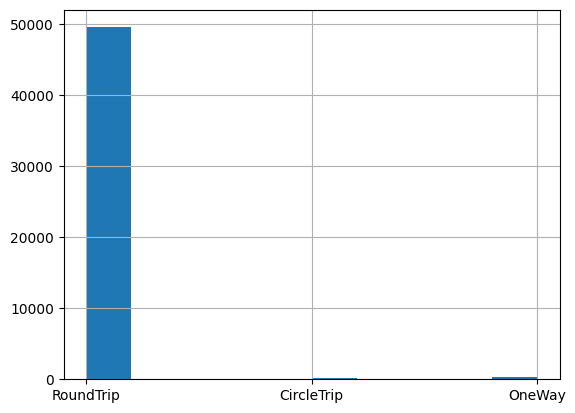

In [47]:
# Persebaran trip_type
df.trip_type.hist()

<Axes: >

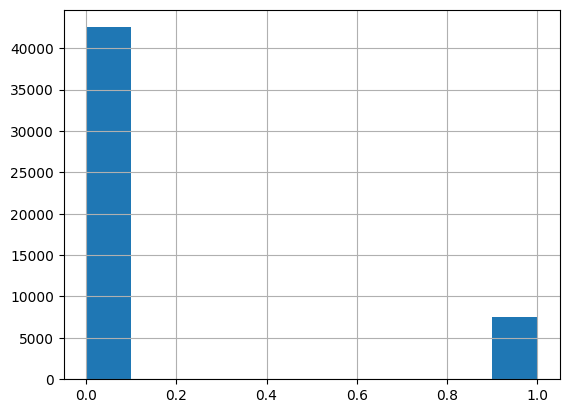

In [48]:
# Persebaran booking_complete
df.booking_complete.hist()

Terlihat persebaran data terdapat imbalance

Remove route column

In [49]:
df.drop(['route', 'booking_origin'],axis=1,inplace=True)

In [50]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0


Encoding for Categorical

In [51]:
df_encode = df

In [52]:
mapping_flight_day = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

mapping_sales_channel = {
    "Internet": 1,
    "Mobile": 2,
}

df_encode["flight_day"] = df_encode["flight_day"].map(mapping_flight_day)
df_encode["sales_channel"] = df_encode["sales_channel"].map(mapping_sales_channel)

One Hot Encoding

Only 1 Time Running

In [53]:
# trip_type column
for tt_column in ['trip_type']:
  onehot = pd.get_dummies(df_encode[tt_column], prefix=tt_column)
  df_encode = df_encode.join(onehot)

In [54]:
df_encode = df_encode.drop(columns=['trip_type'])

In [55]:
df_encode.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,1,262,19,7,6,1,0,0,5.52,0,0,0,1
1,1,1,112,20,3,6,0,0,0,5.52,0,0,0,1
2,2,1,243,22,17,3,1,1,0,5.52,0,0,0,1
3,1,1,96,31,4,6,0,0,1,5.52,0,0,0,1
4,2,1,68,22,15,3,1,0,1,5.52,0,0,0,1


In [56]:
df_encode.describe()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,0.002320,0.007740,0.989940
std,1.020165,0.315812,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,0.048111,0.087637,0.099795
min,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,0.000000,0.000000,1.000000
max,9.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_final = df_encode.drop('booking_complete', axis=1)
df_label = df_encode.booking_complete

Standar Scaler

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_scaled = sc.fit_transform(df_final)

In [59]:
df_scaled = pd.DataFrame(df_scaled, columns=df_final.columns)
df_scaled['booking_complete'] = df_label

In [60]:
df_scaled.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,0.400684,-0.355785,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,-0.048222,-0.08832,0.100808,0
1,-0.579559,-0.355785,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,-0.048222,-0.08832,0.100808,0
2,0.400684,-0.355785,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,-0.048222,-0.08832,0.100808,0
3,-0.579559,-0.355785,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.355785,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,-0.048222,-0.08832,0.100808,0


In [61]:
df_label

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

heatmap

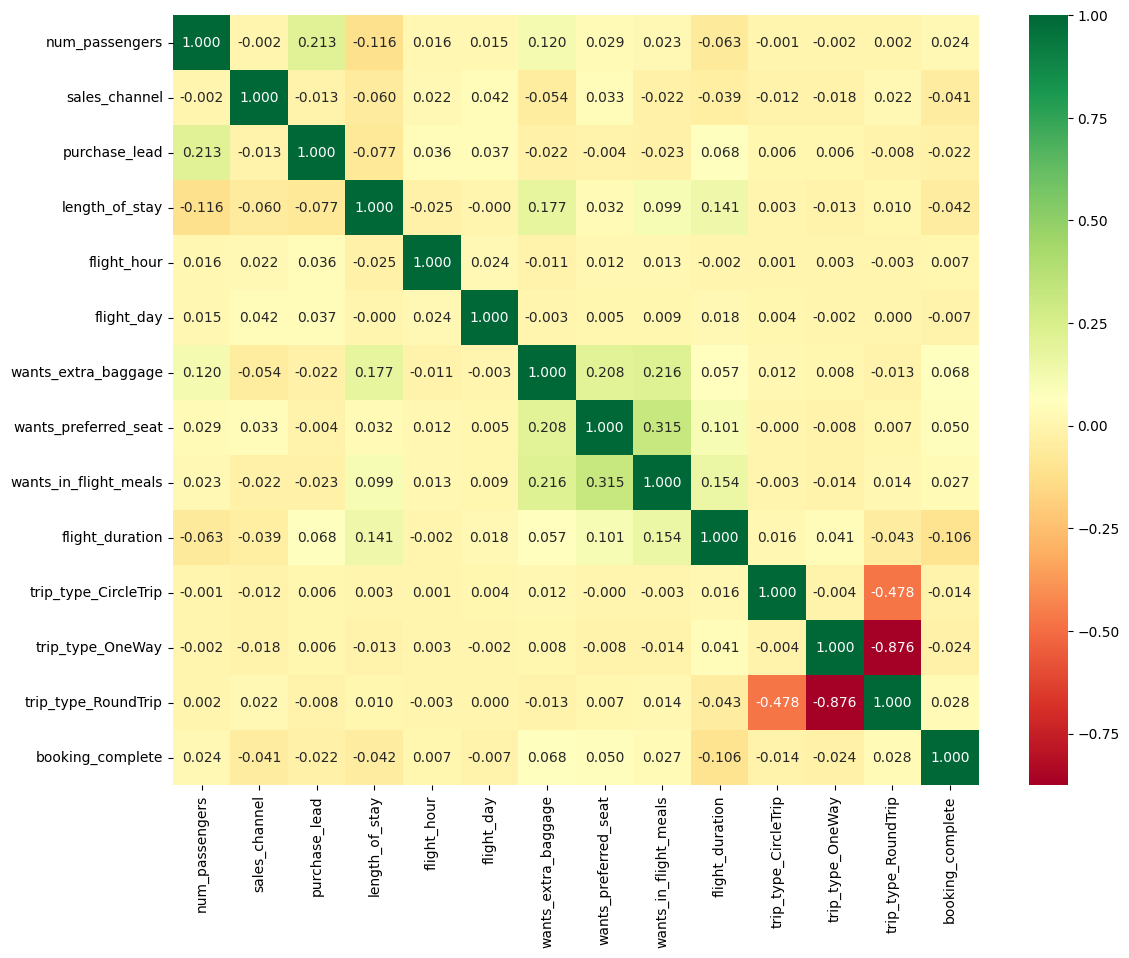

In [62]:
plt.figure(figsize=(13,10))
p=sns.heatmap(df_scaled.corr(), annot=True, fmt='.3f', cmap='RdYlGn')

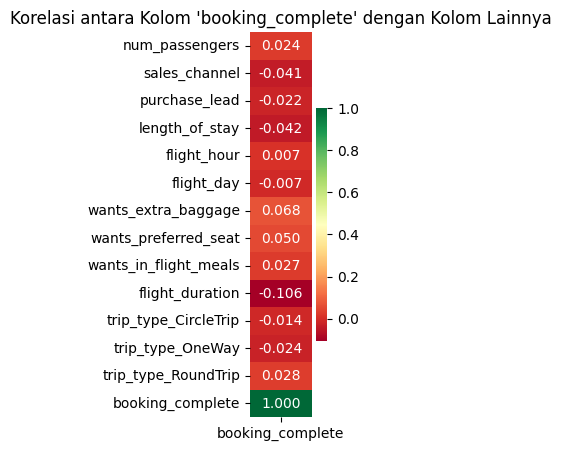

In [63]:
# Misalnya Anda sudah memiliki df (dataframe) dan ingin menghitung korelasi kolom "target_column" dengan semua kolom lainnya
target_column = "booking_complete"  # Ganti dengan nama kolom yang Anda ingin hitung korelasinya

# Menghitung korelasi antara kolom target dengan semua kolom lainnya
correlations = df_scaled.corrwith(df_scaled[target_column])

# Membuat dataframe dari hasil korelasi
correlation_df = pd.DataFrame(correlations, columns=["booking_complete"])

# Membuat heatmap dari dataframe korelasi
plt.figure(figsize=(1, 5))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn', fmt=".3f")
plt.title(f"Korelasi antara Kolom '{target_column}' dengan Kolom Lainnya")
plt.show()


splitting data

X = Feature

y = Label

In [64]:
X = df_scaled.drop('booking_complete',axis=1)
y = df_scaled['booking_complete']

install imbalanced-learn

In [ ]:
!pip install -U imbalanced-learn

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

#over sampling
x_sampling,y_sampling = sm.fit_resample(X,y)

print(x_sampling.shape)
print(y_sampling.shape)

(85044, 13)
(85044,)


In [78]:
df_sampling = x_sampling
df_sampling['booking_complete'] = y_sampling
df_sampling.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,0.400684,-0.355785,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,-0.048222,-0.08832,0.100808,0
1,-0.579559,-0.355785,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,-0.048222,-0.08832,0.100808,0
2,0.400684,-0.355785,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,-0.048222,-0.08832,0.100808,0
3,-0.579559,-0.355785,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.355785,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,-0.048222,-0.08832,0.100808,0


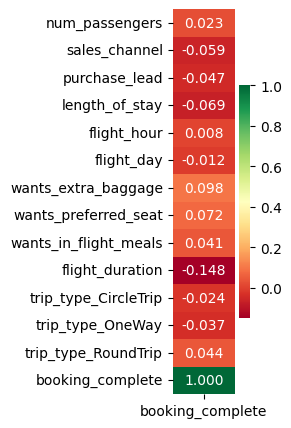

In [81]:
# Menghitung korelasi antara kolom target dengan semua kolom lainnya
correlations = df_sampling.corrwith(df_sampling["booking_complete"])

# Membuat dataframe dari hasil korelasi
correlation_df = pd.DataFrame(correlations, columns=["booking_complete"])

# Membuat heatmap dari dataframe korelasi
plt.figure(figsize=(1, 5))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn', fmt=".3f")
# plt.title(f"Korelasi antara Kolom '{target_column}' dengan Kolom Lainnya")
plt.show()


<Axes: >

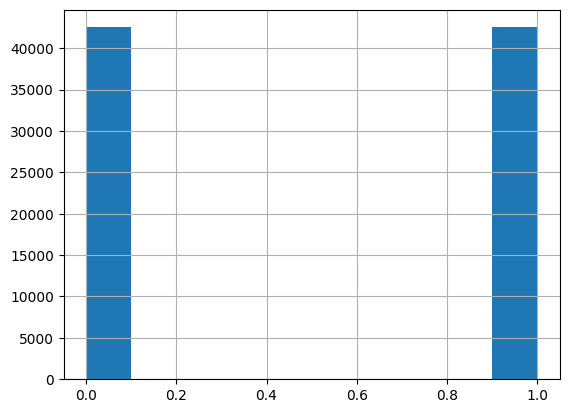

In [67]:
y_sampling.reset_index()['booking_complete'].hist()

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_sampling,y_sampling,test_size=0.3,random_state=0)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59530, 13), (25514, 13), (59530,), (25514,))

# modelling

## Hyperparameter Tuning

In [70]:
# GridSearch
parameter = [

]

## KNN

Perulangan ke: 1
Perulangan ke: 2
Perulangan ke: 3
Perulangan ke: 4
Perulangan ke: 5
Perulangan ke: 6
Perulangan ke: 7
Perulangan ke: 8
Perulangan ke: 9
Perulangan ke: 10
Nilai k KNN Optimal: 1
Skor Optimal: 0.8541193070471114


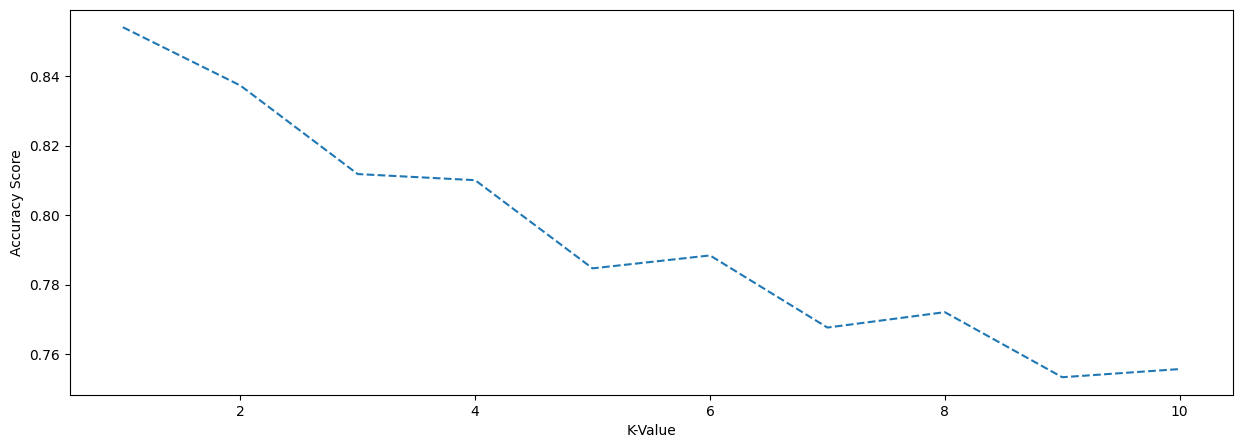

In [72]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

scores = []

lrange = list(range(1,11))

for k in lrange:
  print(f'Perulangan ke: {k}')
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train.ravel())
  y_pred=knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))

optimal_k = lrange[scores.index(max(scores))]
print(f'Nilai k KNN Optimal: {optimal_k}')
print(f'Skor Optimal: {max(scores)}')

plt.plot(lrange,scores,ls='dashed')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')
# plt.title('Accuracy Score untuk nilai k dari Algoritma KNN')
plt.show()

In [73]:
knn2 = KNeighborsClassifier(n_neighbors=1)

knn2.fit(X_train,y_train)
y_pred = knn2.predict(X_test)

In [74]:
acc2 = metrics.accuracy_score(y_test,y_pred)
prec2 = metrics.precision_score(y_test,y_pred)
f1_score2 = metrics.f1_score(y_test,y_pred)

# Evaluasi Metrik

## KNN

In [75]:
print(f'Accuracy: {acc2}\nPrecision: {prec2}\nF1 Score: {f1_score2}')

Accuracy: 0.8541193070471114
Precision: 0.8017934241115908
F1 Score: 0.8664226241745622


Text(0.5, 23.52222222222222, 'Predict Label')

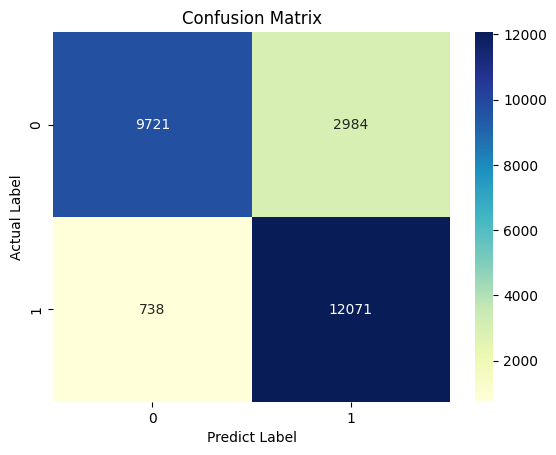

In [82]:
cnf_metric = metrics.confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cnf_metric), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predict Label')

In [77]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     12705
           1       0.80      0.94      0.87     12809

    accuracy                           0.85     25514
   macro avg       0.87      0.85      0.85     25514
weighted avg       0.87      0.85      0.85     25514

